# NIRCam imaging saturation plots

calculated with the JWST ETC Pandeia v2 Python engine in another notebook

as appearing in JDox JWST docuemntation:  
https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-observing-modes/nircam-time-series-observations/nircam-grism-time-series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize']   = 18
mpl.rcParams['xtick.labelsize']  = 18
mpl.rcParams['ytick.labelsize']  = 18
mpl.rcParams['xtick.top']  = True
mpl.rcParams['ytick.right']  = True
mpl.rcParams['xtick.direction']  = 'in'
mpl.rcParams['ytick.direction']  = 'in'
mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['ytick.minor.size']  = 4
#mpl.rcParams['legend.fontsize']  = 14
#mpl.rcParams['legend.numpoints']  = 1
#mpl.rcParams['image.origin']  = 'lower'
#mpl.rcParams['figure.autolayout']  = True

In [3]:
import astropy.io.ascii

In [4]:
filter_table = astropy.io.ascii.read('NIRCam_filters.txt', format='commented_header', header_start=-1)
all_filters = list(filter_table['filter'])
all_filters = [filt.lower() for filt in all_filters]
filter_table[:2]

filter,center,bandwidth,response,lambda1,lambda2
str6,float64,float64,float64,float64,float64
F070W,0.704,0.128,0.237,0.624,0.781
F090W,0.901,0.194,0.318,0.795,1.005


In [5]:
sens_table = astropy.io.ascii.read('nircam_saturation_full.txt') #, format='commented_header', header_start=-1)
sens_table

filt,mag
str6,float64
f070w,15.9814453125
f090w,16.2744140625
f115w,16.1865234375
f140m,15.2880859375
f150w,16.0595703125
f162m,15.1220703125
f164n,12.6904296875
f150w2,17.4072265625
f182m,14.9560546875


In [6]:
def plot_saturations(infile, ylo, yhi, title, outfile=None):
    sens_table = astropy.io.ascii.read(infile) #, format='commented_header', header_start=-1)
    
    fig, ax = plt.subplots(figsize=(9.5,6))

    ss = []
    cc = []
    for i in range(len(sens_table)):
        filter = sens_table['filt'][i]
        mag = sens_table['mag'][i]
                
        ifilt = all_filters.index(filter)
        lam  = filter_table['center'][ifilt]
        lam1 = filter_table['lambda1'][ifilt]
        lam2 = filter_table['lambda2'][ifilt]
        if 'W' in filter.upper():
            sym = 'D'
            lw = 1
            color = 'w'
            ms = 12
            fontweight = 'normal'
            fontsize = 10
            color = 'k'
            style = 'normal'
        elif 'M' in filter.upper():
            sym = 'o'
            lw = 3
            color = 'k'
            ms = 8
            fontweight = 'bold'
            fontsize = 8
            color = 'k'
            style = 'normal'
            #continue
        elif 'N' in filter.upper():
            sym = '+'
            lw = 5
            color = 'k'
            ms = 8
            fontweight = 'normal'
            fontsize = 10
            color= 'k'
            style = 'italic'
            #continue

        dy = 0.9
        dy = 1.5
        y = float(mag)
        
        dy = 0.23
        #if filter in 'F115W F322W2 F470N F480M F200W F187N'.split(): # WL SUB160P
        if filter.upper() in 'F115W F322W2 F466N F480M F200W'.split(): # FULL
            dy = -0.42
            
        plt.text(lam, y-dy, filter.upper(), ha='center', fontsize=fontsize, fontweight=fontweight, color=color, style=style)

        plt.plot([lam1, lam2], [mag, mag], 'k', lw=lw, zorder=-10)
        ss.append(float(mag))
        cc.append(float(lam))

    cmap = 'nipy_spectral'
    plt.scatter(cc, ss, c=cc, s=250, alpha=0.5, cmap=cmap, vmin=0.3, vmax=5.3)

    plt.ylim(ylo, yhi)

    xlo, xhi = 0.5, 5.1
    plt.xlim(xlo, xhi)

    plt.xlabel('Wavelength (microns)')
    plt.ylabel('Saturation K mag (Vega) for G2V star')
    plt.title(title)

    if outfile:
        plt.savefig(outfile)


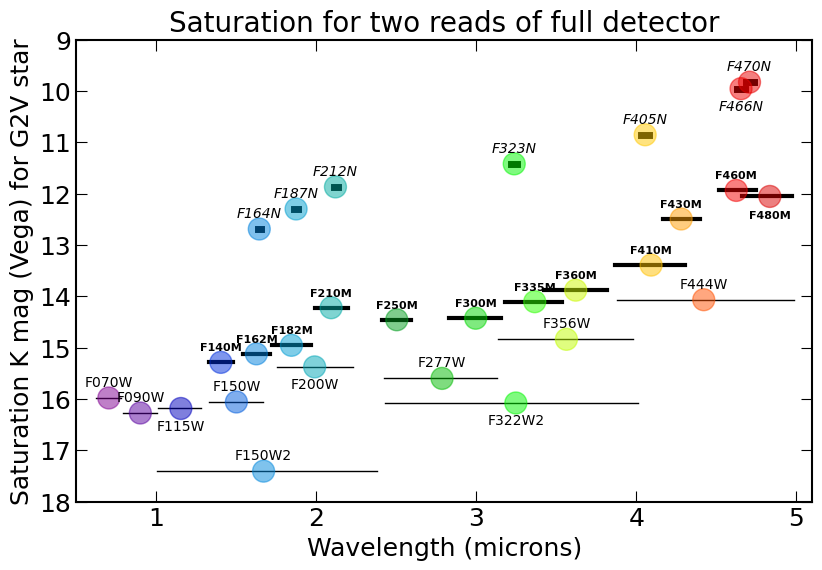

In [7]:
ylo0 = 18
yhi0 =  9
ylo, yhi = ylo0, yhi0
title = 'Saturation for two reads of full detector'
plot_saturations('nircam_saturation_full.txt', ylo, yhi, title, 'NIRCam saturation 2048x2048.png')

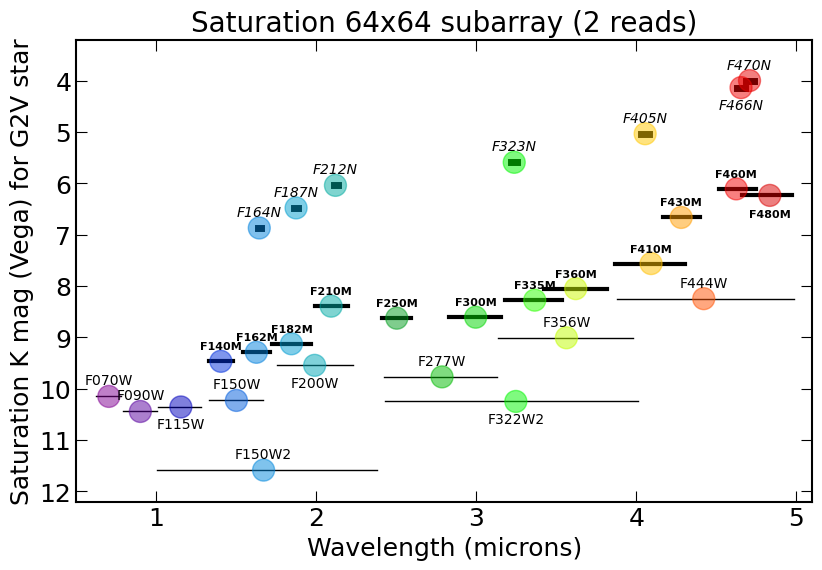

In [8]:
ylo = ylo0 - 5.8
yhi = yhi0 - 5.8
title = 'Saturation 64x64 subarray (2 reads)'
plot_saturations('nircam_saturation_sub64p.txt', ylo, yhi, title, 'NIRCam saturation 64x64.png')

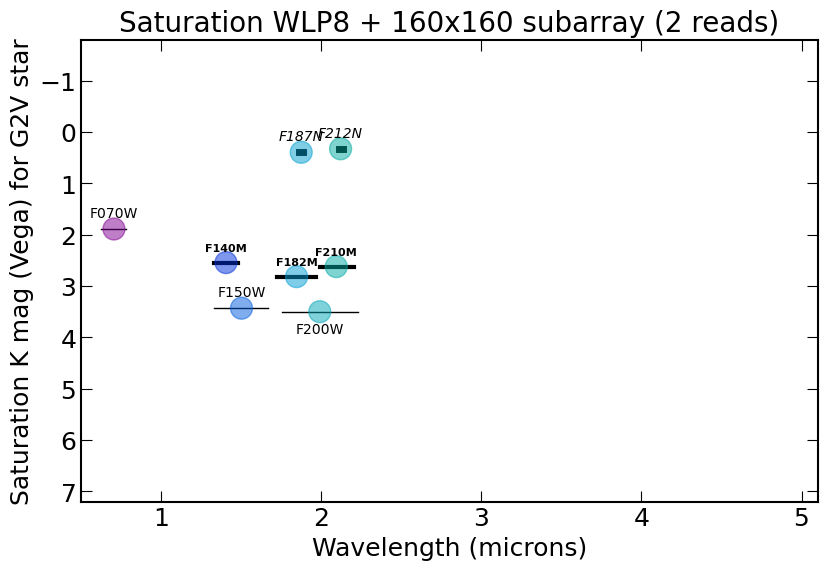

In [9]:
ylo = ylo0 - 10.8
yhi = yhi0 - 10.8
title = 'Saturation WLP8 + 160x160 subarray (2 reads)'
plot_saturations('nircam_saturation_sub160p_wlp8.txt', ylo, yhi, title, 'NIRCam saturation WLP8 160x160.png')